In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bike_daily = pd.read_csv('daily_weather.csv')
bike_master = pd.read_csv('bike_full.csv', dtype={5: str, 7: str})  # Convert both columns to strings
bike_hourly = pd.read_csv('hourly_weather.csv')



In [35]:
# before_cleaning = bike_master.memory_usage(deep=True).sum() / 1024 ** 2
# print(f"Memory usage before cleaning: {before_cleaning:.2f} MB")

Memory usage before cleaning: 6076.61 MB


In [63]:
bike_master.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [55]:
bike_master_clean = bike_master.copy()

# Convert datetime columns
bike_master_clean['started_at'] = pd.to_datetime(bike_master_clean['started_at'])
bike_master_clean['ended_at'] = pd.to_datetime(bike_master_clean['ended_at'])

# Convert category columns
category_columns = ['rideable_type', 'start_station_name', 'end_station_name', 'member_casual']
for col in category_columns:
    bike_master_clean[col] = bike_master_clean[col].astype('category')

# Convert string columns (IDs)
string_columns = ['ride_id', 'start_station_id', 'end_station_id']
for col in string_columns:
    bike_master_clean[col] = bike_master_clean[col].astype('string')



In [56]:
#dropping ride_id column
bike_master_clean = bike_master_clean.drop(columns=['ride_id'])

In [59]:
after_cleaning = bike_master_clean.memory_usage(deep=True).sum() / 1024 ** 2
print(f"Memory usage after cleaning: {after_cleaning:.2f} MB")

Memory usage after cleaning: 1693.02 MB


In [60]:
bike_master_clean.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,<NA>,38.917193,-77.025894,38.960000,-77.020000,casual
2,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [61]:
# Check for missing values in end_station_name and end_station_id
missing_values = bike_master_clean[bike_master_clean['end_station_name'].isna() | bike_master_clean['end_station_id'].isna()]

# Create a mapping of known start_station_id to end_station_name and end_station_id
station_mapping = bike_master_clean.set_index('start_station_id')[['start_station_name']].to_dict()['start_station_name']

# Fill missing values by mapping start_station_id to known station names and IDs
bike_master_clean['end_station_name'] = bike_master_clean.apply(lambda row: station_mapping.get(row['end_station_id'], row['end_station_name']), axis=1)
bike_master_clean['end_station_id'] = bike_master_clean['end_station_id'].fillna(bike_master_clean['start_station_id'])


In [62]:
bike_master_clean.isnull().sum()

rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        432755
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [65]:
#print the number of unique start station names and start station ids
print(f"Number of unique start station names: {bike_master_clean['start_station_name'].nunique()}", f"Number of unique start station IDs: {bike_master_clean['start_station_id'].nunique()}", sep='\n')

Number of unique start station names: 860
Number of unique start station IDs: 1321


In [3]:
# # bike_master_clean.dtypes
# # bike_master_clean.head()
# # bike_master_clean.shape
# bike_master_clean.isnull().sum()

In [6]:
bike_hourly.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [45]:
Memeroy_usage = bike_hourly.memory_usage(deep=True).sum() / 1024 ** 2
print(f"Memory usage before cleaning: {Memeroy_usage:.2f} MB")

Memory usage before cleaning: 3.08 MB


In [7]:
bike_hourly.dtypes

Casual                     float64
Date                        object
Hour                         int64
Member                     float64
Total_rides                float64
relativehumidity_2m (%)      int64
temperature_2m (°C)        float64
weathercode (wmo code)       int64
windspeed_10m (km/h)       float64
dtype: object

In [8]:
#create a copy of the bike hourly data
bike_hourly_new = bike_hourly.copy()

In [9]:
# Convert the 'Date' column to datetime
bike_hourly_new['Date'] = pd.to_datetime(bike_hourly_new['Date'])

# Ensure 'Hour' is integer (if it's not already)
bike_hourly_new['Hour'] = bike_hourly_new['Hour'].astype(int)

# Convert float columns correctly
float_columns = ['Casual', 'Member', 'Total_rides', 'temperature_2m (°C)', 'windspeed_10m (km/h)']
bike_hourly_new[float_columns] = bike_hourly_new[float_columns].astype(float)

# Convert integer columns
int_columns = ['relativehumidity_2m (%)', 'weathercode (wmo code)']
bike_hourly_new[int_columns] = bike_hourly_new[int_columns].astype(int)

# Check the updated data types
print(bike_hourly_new.dtypes)


Casual                            float64
Date                       datetime64[ns]
Hour                                int64
Member                            float64
Total_rides                       float64
relativehumidity_2m (%)             int64
temperature_2m (°C)               float64
weathercode (wmo code)              int64
windspeed_10m (km/h)              float64
dtype: object


In [11]:
#change the columns to lowercase and remove spaces
bike_hourly_new.columns = bike_hourly_new.columns.str.lower().str.replace(' ', '_')
bike_hourly_new.head()

,casual,date,hour,member,total_rides,relativehumidity_2m_(%),temperature_2m_(°c),weathercode_(wmo_code),windspeed_10m_(km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


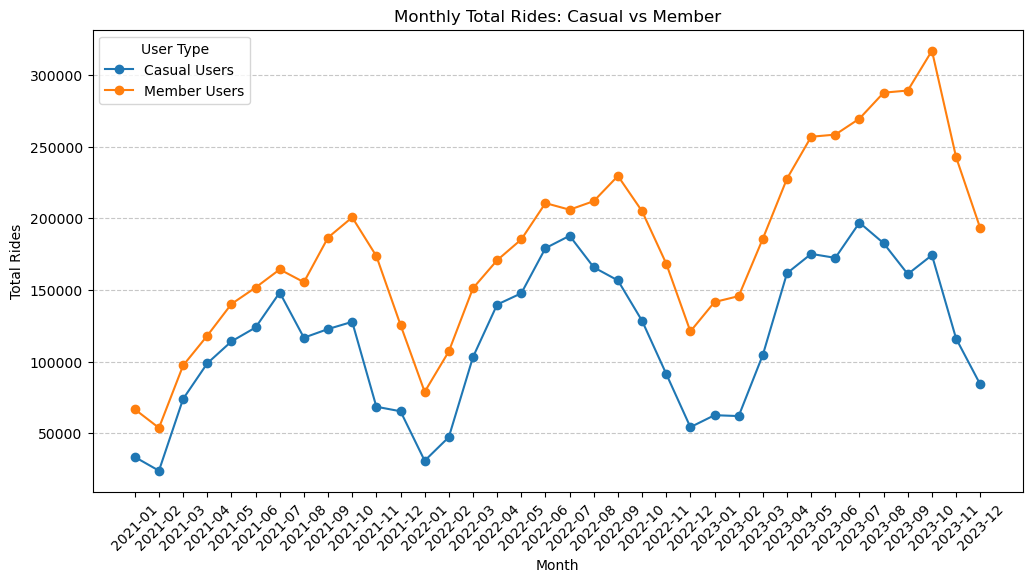

In [15]:
# Ensure 'date' is in datetime format
bike_hourly_new['date'] = pd.to_datetime(bike_hourly_new['date'])

# Extract year and month for grouping
bike_hourly_new['YearMonth'] = bike_hourly_new['date'].dt.to_period('M')

# Group by YearMonth and sum rides for casual and member users
monthly_rides = bike_hourly_new.groupby('YearMonth')[['casual', 'member']].sum()

# Plot the data as a line graph
plt.figure(figsize=(12,6))
plt.plot(monthly_rides.index.astype(str), monthly_rides['casual'], marker='o', label='Casual Users')
plt.plot(monthly_rides.index.astype(str), monthly_rides['member'], marker='o', label='Member Users')

# Customize plot
plt.title('Monthly Total Rides: Casual vs Member')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


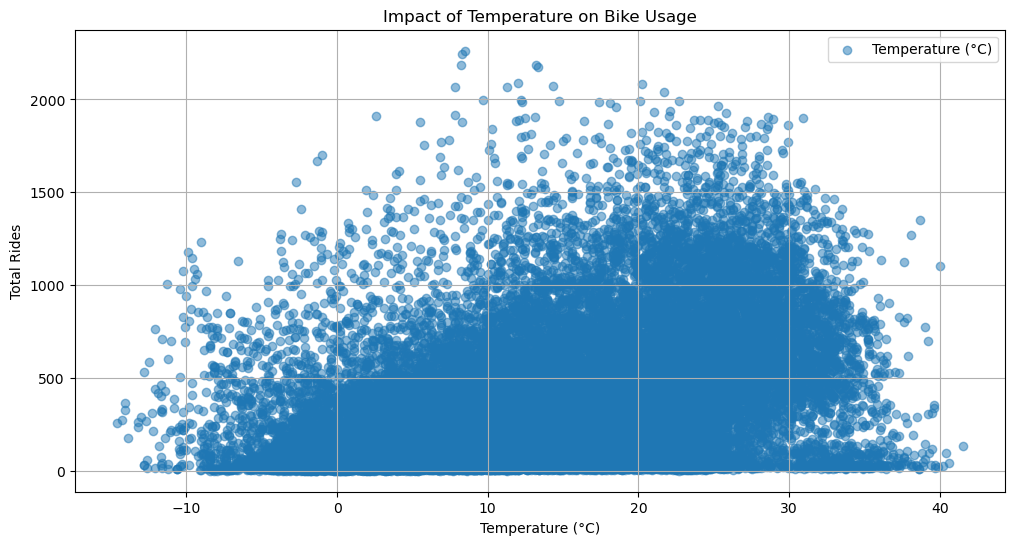

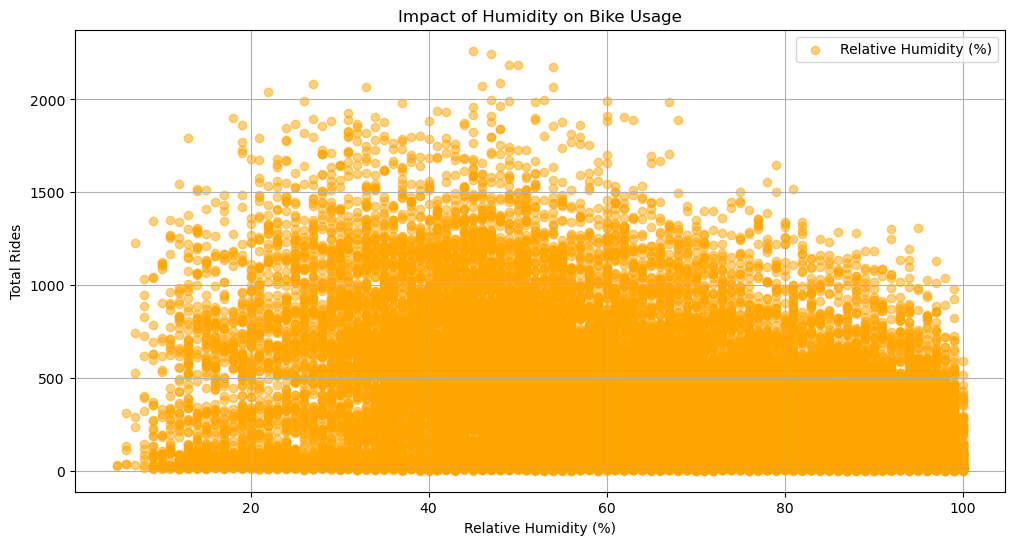

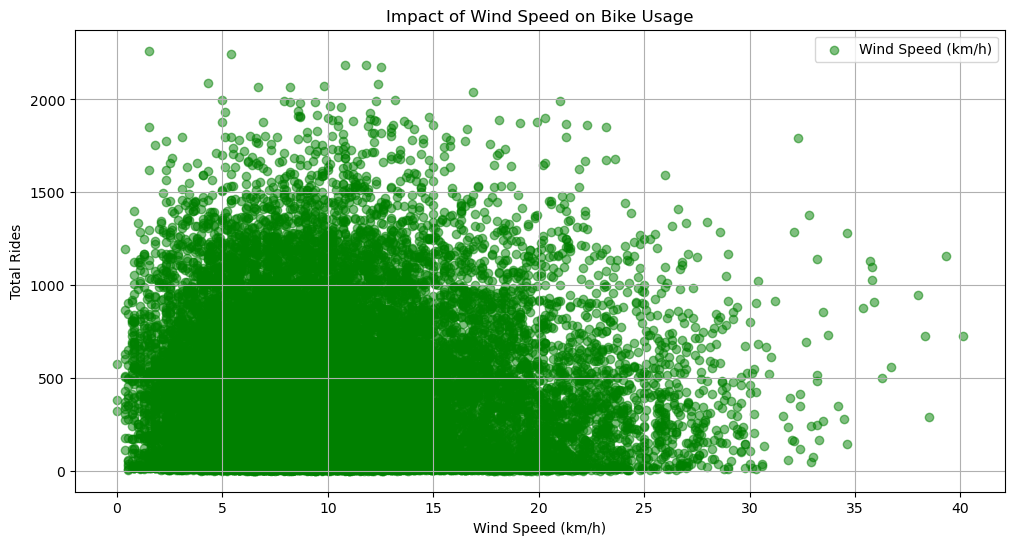

In [16]:
# Plot the impact of weather conditions on bike usage
plt.figure(figsize=(12,6))

# Scatter plot for temperature vs total rides
plt.scatter(bike_hourly_new['temperature_2m_(°c)'], bike_hourly_new['total_rides'], alpha=0.5, label='Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rides')
plt.title('Impact of Temperature on Bike Usage')
plt.grid(True)
plt.legend()
plt.show()

# Scatter plot for humidity vs total rides
plt.figure(figsize=(12,6))
plt.scatter(bike_hourly_new['relativehumidity_2m_(%)'], bike_hourly_new['total_rides'], alpha=0.5, color='orange', label='Relative Humidity (%)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Total Rides')
plt.title('Impact of Humidity on Bike Usage')
plt.grid(True)
plt.legend()
plt.show()

# Scatter plot for wind speed vs total rides
plt.figure(figsize=(12,6))
plt.scatter(bike_hourly_new['windspeed_10m_(km/h)'], bike_hourly_new['total_rides'], alpha=0.5, color='green', label='Wind Speed (km/h)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Total Rides')
plt.title('Impact of Wind Speed on Bike Usage')
plt.grid(True)
plt.legend()
plt.show()



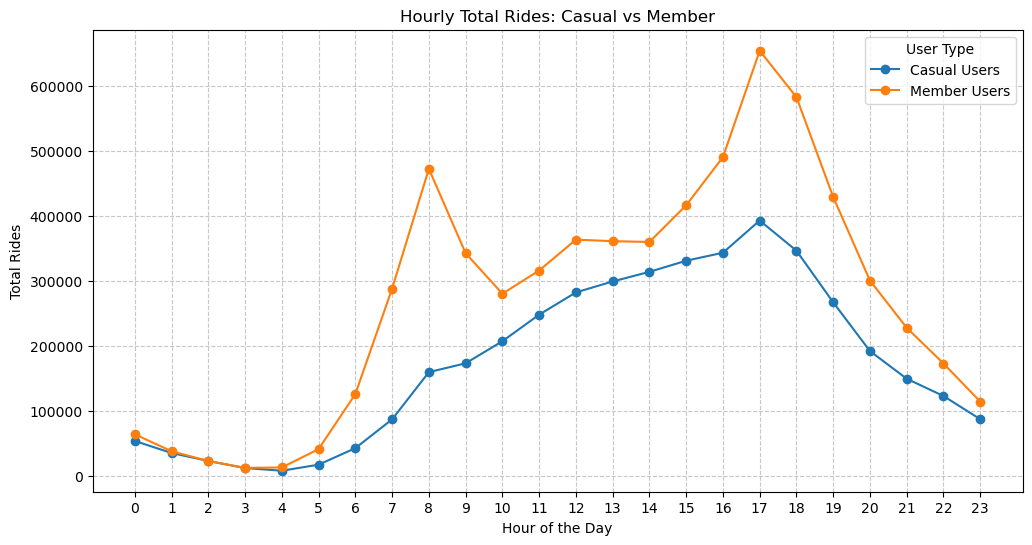

In [17]:
# Group the data by 'hour' and sum rides for casual and member users
hourly_rides = bike_hourly_new.groupby('hour')[['casual', 'member']].sum()

# Plot the data as a line graph
plt.figure(figsize=(12,6))
plt.plot(hourly_rides.index, hourly_rides['casual'], marker='o', label='Casual Users')
plt.plot(hourly_rides.index, hourly_rides['member'], marker='o', label='Member Users')

# Customize the plot
plt.title('Hourly Total Rides: Casual vs Member')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rides')
plt.xticks(range(0, 24))  # Ensure all hours are represented
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='User Type')

# Show the plot
plt.show()


In [22]:
import pandas as pd

# Ensure 'date' is in datetime format
bike_hourly_new['date'] = pd.to_datetime(bike_hourly_new['date'])

# Extract year and month for grouping
bike_hourly_new['YearMonth'] = bike_hourly_new['date'].dt.to_period('M')
bike_hourly_new['Year'] = bike_hourly_new['date'].dt.year

# Group by year and month and sum rides
yearly_rides = bike_hourly_new.groupby(['Year', bike_hourly_new['date'].dt.month])[['casual', 'member']].sum().reset_index()

# Pivot the data to have years as columns
pivot_rides = yearly_rides.pivot(index='date', columns='Year', values=['casual', 'member'])

# Calculate year-over-year growth percentage
pivot_rides['casual_growth_2023_vs_2022'] = ((pivot_rides['casual', 2023] - pivot_rides['casual', 2022]) / pivot_rides['casual', 2022]) * 100
pivot_rides['casual_growth_2022_vs_2021'] = ((pivot_rides['casual', 2022] - pivot_rides['casual', 2021]) / pivot_rides['casual', 2021]) * 100

pivot_rides['member_growth_2023_vs_2022'] = ((pivot_rides['member', 2023] - pivot_rides['member', 2022]) / pivot_rides['member', 2022]) * 100
pivot_rides['member_growth_2022_vs_2021'] = ((pivot_rides['member', 2022] - pivot_rides['member', 2021]) / pivot_rides['member', 2021]) * 100

# Select only relevant columns for display
growth_data = pivot_rides[['casual_growth_2023_vs_2022', 'casual_growth_2022_vs_2021', 
                           'member_growth_2023_vs_2022', 'member_growth_2022_vs_2021']]

# Print the growth data
print(growth_data.to_string(index=True))


     casual_growth_2023_vs_2022 casual_growth_2022_vs_2021 member_growth_2023_vs_2022 member_growth_2022_vs_2021
Year                                                                                                            
date                                                                                                            
1                    103.268568                  -7.814419                  79.494172                  18.232533
2                     31.107537                  98.433497                  36.029439                  99.404030
3                      1.533582                  39.469946                  22.889295                  55.435587
4                     15.656530                  41.534753                  33.352667                  44.618891
5                     18.619980                  29.458037                  38.684665                  32.146960
6                     -3.787016                  44.720597                  22.701668           

<Figure size 1200x600 with 0 Axes>

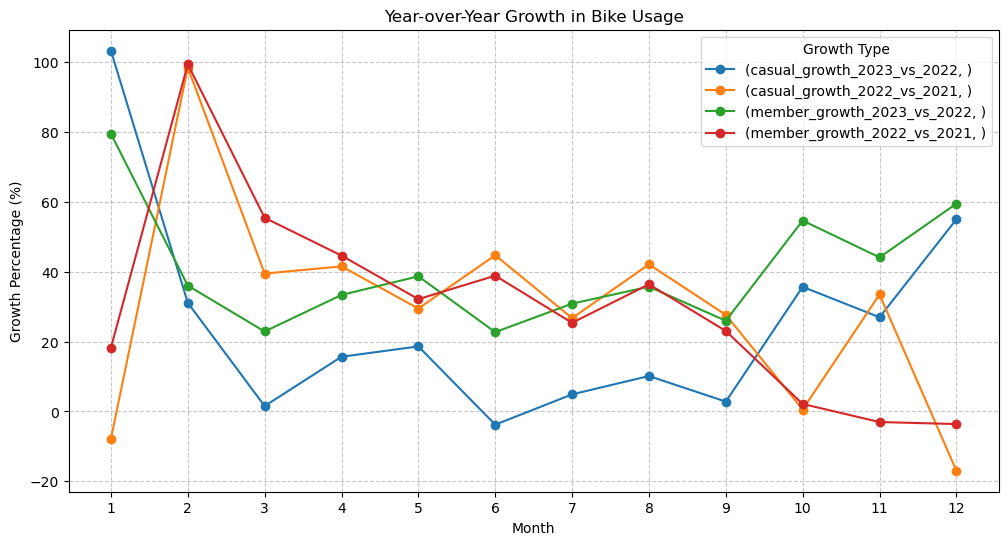

In [23]:

# Ensure 'date' is in datetime format
bike_hourly_new['date'] = pd.to_datetime(bike_hourly_new['date'])

# Extract year and month for grouping
bike_hourly_new['YearMonth'] = bike_hourly_new['date'].dt.to_period('M')
bike_hourly_new['Year'] = bike_hourly_new['date'].dt.year
bike_hourly_new['Month'] = bike_hourly_new['date'].dt.month

# Group by year and month and sum rides
yearly_rides = bike_hourly_new.groupby(['Year', 'Month'])[['casual', 'member']].sum().reset_index()

# Pivot the data to have years as columns for comparison
pivot_rides = yearly_rides.pivot(index='Month', columns='Year', values=['casual', 'member'])

# Calculate year-over-year growth percentage
pivot_rides['casual_growth_2023_vs_2022'] = ((pivot_rides['casual', 2023] - pivot_rides['casual', 2022]) / pivot_rides['casual', 2022]) * 100
pivot_rides['casual_growth_2022_vs_2021'] = ((pivot_rides['casual', 2022] - pivot_rides['casual', 2021]) / pivot_rides['casual', 2021]) * 100

pivot_rides['member_growth_2023_vs_2022'] = ((pivot_rides['member', 2023] - pivot_rides['member', 2022]) / pivot_rides['member', 2022]) * 100
pivot_rides['member_growth_2022_vs_2021'] = ((pivot_rides['member', 2022] - pivot_rides['member', 2021]) / pivot_rides['member', 2021]) * 100

# Select only relevant columns for plotting
growth_data = pivot_rides[['casual_growth_2023_vs_2022', 'casual_growth_2022_vs_2021', 
                           'member_growth_2023_vs_2022', 'member_growth_2022_vs_2021']]

# Plot the growth data
plt.figure(figsize=(12, 6))
growth_data.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Year-over-Year Growth in Bike Usage')
plt.xlabel('Month')
plt.ylabel('Growth Percentage (%)')
plt.xticks(range(1, 13))
plt.legend(title='Growth Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



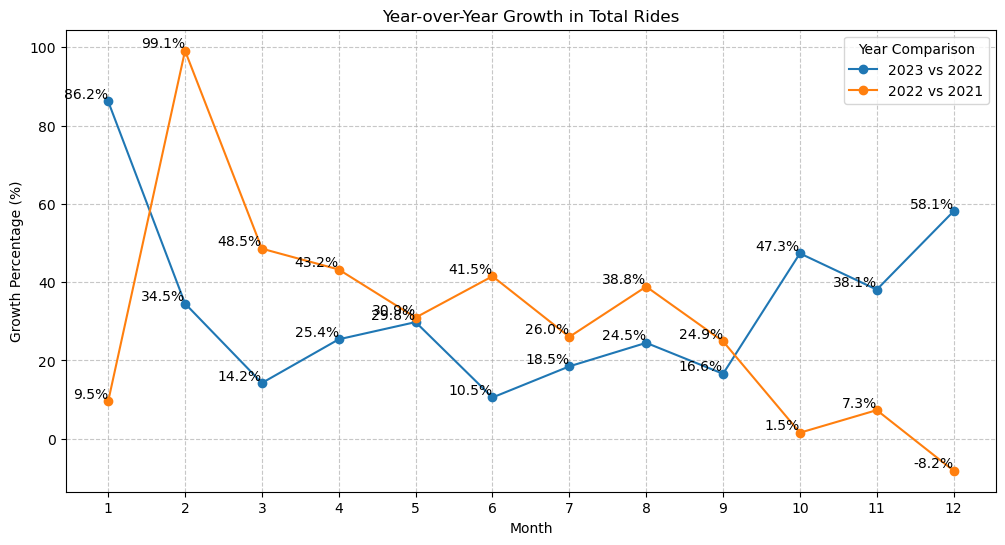

In [ ]:

# Ensure 'date' is in datetime format
bike_hourly_new['date'] = pd.to_datetime(bike_hourly_new['date'])

# Extract year and month for grouping
bike_hourly_new['YearMonth'] = bike_hourly_new['date'].dt.to_period('M')
bike_hourly_new['Year'] = bike_hourly_new['date'].dt.year
bike_hourly_new['Month'] = bike_hourly_new['date'].dt.month

# Group by year and month and sum total rides
yearly_rides = bike_hourly_new.groupby(['Year', 'Month'])['total_rides'].sum().reset_index()

# Pivot the data to have years as columns for comparison
pivot_rides = yearly_rides.pivot(index='Month', columns='Year', values='total_rides')

# Calculate year-over-year growth percentage
pivot_rides['growth_2023_vs_2022'] = ((pivot_rides[2023] - pivot_rides[2022]) / pivot_rides[2022]) * 100
pivot_rides['growth_2022_vs_2021'] = ((pivot_rides[2022] - pivot_rides[2021]) / pivot_rides[2021]) * 100

# Plot the year-over-year growth with percentage labels
plt.figure(figsize=(12, 6))
for column, label in zip(['growth_2023_vs_2022', 'growth_2022_vs_2021'], ['2023 vs 2022', '2022 vs 2021']):
    plt.plot(pivot_rides.index, pivot_rides[column], marker='o', label=label)
    for i, value in enumerate(pivot_rides[column]):
        plt.text(pivot_rides.index[i], value, f'{value:.1f}%', ha='right', va='bottom')

# Customize plot
plt.title('Year-over-Year Growth in Total Rides')
plt.xlabel('Month')
plt.ylabel('Growth Percentage (%)')
plt.xticks(range(1, 13))  # Ensure all months are represented
plt.legend(title='Year Comparison')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()



In [27]:
bike_hourly.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
